# Homework 02

Importing all the required libraries to complete the assignment

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

### Task 1:
Obtain the 200 top-ranking universities in www.topuniversities.com ([ranking 2018](https://www.topuniversities.com/university-rankings/world-university-rankings/2018)).

In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total).

Store the resulting dataset in a pandas DataFrame and answer the following questions:
- Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?
- Answer the previous question aggregating the data by (c) country and (d) region.

In order to extract this information, we first examined the webpage using Postman Interceptor. We discovered that the data is not found in the html, rather it is imported from a [json file](https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508627223168) requested from the server.

So we make a request for this same file, and import the data from the json to a dataframe.

Since the data is sorted, we trim the dataframe to have only the top 200 results. Thus we have the Name, Rank, Country and Region for each of these universities. We drop the columns we do not require.

In order to get the remaining data, we keep the url column for now.

In [101]:
#import topuni data
topuni_url = 'https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508627223168'
request = requests.get(topuni_url)
topuni_data = request.json()['data']

#add data to dataframe
topuni_df = pd.io.json.json_normalize(topuni_data)

#trim data frame to top 200 universities
topuni_df = topuni_df.head(200)

#drop columns that we don't need
topuni_df = topuni_df.drop(["cc", "core_id","logo","guide","nid","score","stars"],axis=1)

topuni_df.head()

,country,rank_display,region,title,url
0,United States,1,North America,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...
1,United States,2,North America,Stanford University,/universities/stanford-university
2,United States,3,North America,Harvard University,/universities/harvard-university
3,United States,4,North America,California Institute of Technology (Caltech),/universities/california-institute-technology-...
4,United Kingdom,5,Europe,University of Cambridge,/universities/university-cambridge


Now we defined the `get_university_data()` function. This function takes the university url, and returns the data on student numbers (total and international) and faculty numbers (total and international).

To do so it uses the BeautifulSoup library.

In [102]:
#cleans the result, and returns an int.
def result2int(result):
    return int(result.replace('\n','').replace(' ','').replace(',',''))

#searches the soup for the class we are looking for, and once found returns the relevant data. If not found, returns NaN.
def search_uni_soup(soup, class_name):
    try:
        search_lv1 = soup.find('div',class_=class_name)
        search_lv2 = search_lv1.find('div',class_='number').text
        return result2int(search_lv2)
    except:
        return np.nan

def get_university_data(uni_url):
    req = requests.get('https://www.topuniversities.com'+uni_url)
    page_body = req.text
    soup = BeautifulSoup(page_body, 'html.parser')
    total_student = search_uni_soup(soup, 'total student')
    inter_student = search_uni_soup(soup, 'total inter')
    total_faculty = search_uni_soup(soup, 'total faculty')
    inter_faculty = search_uni_soup(soup, 'inter faculty')
    return total_student, inter_student, total_faculty, inter_faculty

#testing to see if get_university function is working
get_university_data('/universities/stanford-university')

(15878, 3611, 4285, 2042)

Next we decided to go through the results to see if we were having any errors. The code crashed on New York University, so we went back to the function and handled numbers not found as NaN. After this we parsed through all the results and saw that New York University and Indian Institute of Science Bangalore were the only 2 rows that had NaNs. We will have to handle these special cases.

In [103]:
#add uni data to the data frame
for index, url in enumerate(topuni_df['url']):
    print(get_university_data(url), url)

#results show error on New York University and Indian Institute of Science Bangalore. Need to handle these NaNs.

(11067, 3717, 2982, 1679) /universities/massachusetts-institute-technology-mit
(15878, 3611, 4285, 2042) /universities/stanford-university
(22429, 5266, 4350, 1311) /universities/harvard-university
(2255, 647, 953, 350) /universities/california-institute-technology-caltech
(18770, 6699, 5490, 2278) /universities/university-cambridge
(19720, 7353, 6750, 2964) /universities/university-oxford
(31080, 14854, 6345, 2554) /universities/ucl-university-college-london
(16090, 8746, 3930, 2071) /universities/imperial-college-london
(13557, 3379, 2449, 635) /universities/university-chicago
(19815, 7563, 2477, 1886) /universities/eth-zurich-swiss-federal-institute-technology
(25738, 7251, 4338, 2993) /universities/nanyang-technological-university-singapore-ntu
(10343, 5896, 1695, 1300) /universities/ecole-polytechnique-f%C3%A9d%C3%A9rale-de-lausanne-epfl
(8069, 1793, 1007, 246) /universities/princeton-university
(21904, 5411, 2718, 970) /universities/cornell-university
(32728, 8917, 5106, 3086) /u

(16135, 6806, 1885, 801) /universities/queen-mary-university-london
(18660, 1787, 2858, 246) /universities/kyushu-university
(35504, 4683, 3920, 473) /universities/university-maryland-college-park
(39112, 9688, 2961, 1037) /universities/universite-de-montreal
(24305, 4213, 2273, 253) /universities/universit%C3%A9-pierre-et-marie-curie-upmc
(38749, 9170, 3124, 551) /universities/university-southern-california
(9257, 1465, 1077, 336) /universities/chalmers-university-technology
(23149, 2128, 1449, 267) /universities/university-california-santa-barbara-ucsb
(12300, 4464, 1245, 435) /universities/lancaster-university
(15999, 3364, 1833, 636) /universities/university-york
(24565, 6090, 2755, 705) /universities/cardiff-university
(27003, 991, 2260, 198) /universities/pontificia-universidad-cat%C3%B3lica-de-chile-uc
(12147, 1831, 1257, 370) /universities/aalto-university
(23702, 3548, 3231, 1170) /universities/mcmaster-university
(44517, 8556, 3176, 449) /universities/rwth-aachen-university
(

Now that we know our functions are working we add the new columns to our dataframe.

In [104]:
#adding columns for total students and international students
topuni_df["Total Students"] = topuni_df['url'].map(lambda x : get_university_data(x)[0])
topuni_df["International Students"] = topuni_df['url'].map(lambda x : get_university_data(x)[1])

In [105]:
#adding columns for total faculty and international faculty
topuni_df["Total Faculty"] = topuni_df['url'].map(lambda x : get_university_data(x)[2])
topuni_df["International Faculty"] = topuni_df['url'].map(lambda x : get_university_data(x)[3])

We can now drop the url column

In [106]:
#drop columns that we don't need
topuni_df = topuni_df.drop(["url"],axis=1)
topuni_df.head()

,country,rank_display,region,title,Total Students,International Students,Total Faculty,International Faculty
0,United States,1,North America,Massachusetts Institute of Technology (MIT),11067.0,3717.0,2982.0,1679.0
1,United States,2,North America,Stanford University,15878.0,3611.0,4285.0,2042.0
2,United States,3,North America,Harvard University,22429.0,5266.0,4350.0,1311.0
3,United States,4,North America,California Institute of Technology (Caltech),2255.0,647.0,953.0,350.0
4,United Kingdom,5,Europe,University of Cambridge,18770.0,6699.0,5490.0,2278.0


Now that we have our data we can solve the questions.
#### a) Which are the best universities in terms of the ratio between faculty and staff?
To answer this question we will add a new column which computes this ratio, and sort our dataframe by this value. We assume that the higher the ratio, the better the university is. (1 faculty : 5 students is better than 1 faculty : 10 students)

In [107]:
topuni_df["Faculty/Student ratio"] = topuni_df['Total Faculty']/topuni_df['Total Students']
topuni_df.sort_values("Faculty/Student ratio",ascending=False).head()

,country,rank_display,region,title,Total Students,International Students,Total Faculty,International Faculty,Faculty/Student ratio
3,United States,4,North America,California Institute of Technology (Caltech),2255.0,647.0,953.0,350.0,0.422616
15,United States,16,North America,Yale University,12402.0,2469.0,4940.0,1708.0,0.398323
5,United Kingdom,6,Europe,University of Oxford,19720.0,7353.0,6750.0,2964.0,0.342292
4,United Kingdom,5,Europe,University of Cambridge,18770.0,6699.0,5490.0,2278.0,0.292488
16,United States,17,North America,Johns Hopkins University,16146.0,4105.0,4462.0,1061.0,0.276353


The best university in terms of Faculty:Student ratio is **California Institute of Technology (Caltech)**

#### b) Which are the best universities in terms of the ratio of international students
To answer this question we will add a new column which computes the ratio between international students and total students, and sort our dataframe by this value. We assume that the higher the ratio, the better the university is. (1 international : 5 total is better than 1 international : 10 total)

In [108]:
topuni_df["Inter/Total student ratio"] = topuni_df['International Students']/topuni_df['Total Students']
topuni_df.sort_values("Inter/Total student ratio",ascending=False).head()

,country,rank_display,region,title,Total Students,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
34,United Kingdom,35,Europe,London School of Economics and Political Scien...,9760.0,6748.0,1088.0,687.0,0.111475,0.691393
11,Switzerland,12,Europe,Ecole Polytechnique Fédérale de Lausanne (EPFL),10343.0,5896.0,1695.0,1300.0,0.163879,0.570047
7,United Kingdom,8,Europe,Imperial College London,16090.0,8746.0,3930.0,2071.0,0.244251,0.543567
198,Netherlands,200,Europe,Maastricht University,16385.0,8234.0,1277.0,502.0,0.077937,0.502533
47,United States,=47,North America,Carnegie Mellon University,13356.0,6385.0,1342.0,425.0,0.100479,0.478062


The best university in terms of International Student ratio is **London School of Economics and Political Science (LSE)**

#### c) Aggregate by country
To answer this question we will add aggregate all the values by country, and recalculate the Faculty:Student ratio and International:Total student ratio with the aggregated figures

In [109]:
topuni_country_df = topuni_df.drop(["Inter/Total student ratio", "Faculty/Student ratio"],axis=1)
topuni_country_df = topuni_country_df.groupby("country",as_index=False).sum()
topuni_country_df["Faculty/Student ratio"] = topuni_country_df['Total Faculty']/topuni_country_df['Total Students']
topuni_country_df["Inter/Total student ratio"] = topuni_country_df['International Students']/topuni_country_df['Total Students']

In [110]:
topuni_country_df.sort_values("Faculty/Student ratio",ascending=False).head()

,country,Total Students,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
23,Russia,30233.0,5098.0,6709.0,373.0,0.221910,0.168624
8,Denmark,67223.0,9543.0,11916.0,3904.0,0.177261,0.141960
24,Saudi Arabia,6040.0,989.0,1062.0,665.0,0.175828,0.163742
25,Singapore,58466.0,16168.0,9444.0,6079.0,0.161530,0.276537
18,Malaysia,17902.0,3476.0,2755.0,655.0,0.153893,0.194168


The country that is best in terms of Faculty:Student ratio is **Russia**

In [111]:
topuni_country_df.sort_values("Inter/Total student ratio",ascending=False).head()

,country,Total Students,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
1,Australia,301994.0,106359.0,22034.0,11382.0,0.072962,0.352189
32,United Kingdom,583621.0,199426.0,79934.0,30216.0,0.136962,0.341705
12,Hong Kong,78838.0,24499.0,10166.0,6296.0,0.128948,0.310751
2,Austria,63446.0,19667.0,4117.0,1572.0,0.064890,0.309980
30,Switzerland,109112.0,32995.0,15323.0,9208.0,0.140434,0.302396


The country that is best in terms of International Student ratio is **Australia**

#### d) Aggregate by region
To answer this question we will add aggregate all the values by region, and recalculate the Faculty:Student ratio and International:Total student ratio with the aggregated figures

In [112]:
topuni_region_df = topuni_df.drop(["Inter/Total student ratio", "Faculty/Student ratio"],axis=1)
topuni_region_df = topuni_region_df.groupby("region",as_index=False).sum()
topuni_region_df["Faculty/Student ratio"] = topuni_region_df['Total Faculty']/topuni_region_df['Total Students']
topuni_region_df["Inter/Total student ratio"] = topuni_region_df['International Students']/topuni_region_df['Total Students']

In [113]:
topuni_region_df.sort_values("Faculty/Student ratio",ascending=False).head()

,region,Total Students,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
1,Asia,807003.0,110100.0,106734.0,25462.0,0.132260,0.136431
4,North America,1546353.0,292116.0,182123.0,43836.0,0.117776,0.188906
2,Europe,1957251.0,449364.0,218358.0,67598.0,0.111564,0.229589
3,Latin America,435750.0,36871.0,45382.0,5648.0,0.104147,0.084615
0,Africa,19593.0,3325.0,1733.0,379.0,0.088450,0.169703


The region that is best in terms of Faculty:Student ratio is **Asia**

In [114]:
topuni_region_df.sort_values("Inter/Total student ratio",ascending=False).head()

,region,Total Students,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
5,Oceania,350167.0,118798.0,25347.0,12786.0,0.072385,0.339261
2,Europe,1957251.0,449364.0,218358.0,67598.0,0.111564,0.229589
4,North America,1546353.0,292116.0,182123.0,43836.0,0.117776,0.188906
0,Africa,19593.0,3325.0,1733.0,379.0,0.088450,0.169703
1,Asia,807003.0,110100.0,106734.0,25462.0,0.132260,0.136431


The region that is best in terms of International Student ratio is **Oceania**

We now want to vizualize the data in the dataframes. We have decided to visualize:
- Average ranking per region and country
- Average ratios per couuntry and region

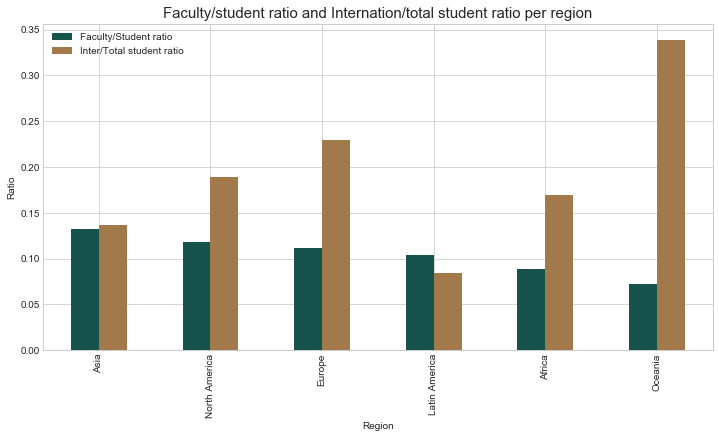

In [115]:
#importing libaries and setting style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('cubehelix',3)

#Creating new dataframe only containing relevant data
topuni_region_df_plot = topuni_region_df.drop(['Total Students', 'International Students','Total Faculty','International Faculty'], axis=1)
topuni_region_df_plot = topuni_region_df_plot.sort_values('Faculty/Student ratio',ascending=False)
topuni_region_df_plot = topuni_region_df_plot.set_index('region')


#Plotting and adding info
topuni_region_df_plot.plot.bar(figsize=(12,6))

plt.title('Faculty/student ratio and Internation/total student ratio per region',fontsize=15)
plt.ylabel('Ratio')
plt.xlabel('Region')
plt.show()

Here we see a plot where the ratios between both *international/total number of students* and *faculty members/students* are plotted together as an average per region. The plot is sorted after the faculty/student ratio and as we can observe that there doesn't really seem to be any correlation between the two ratios.


We will now look at the same type of plot but with an average calculated per country.

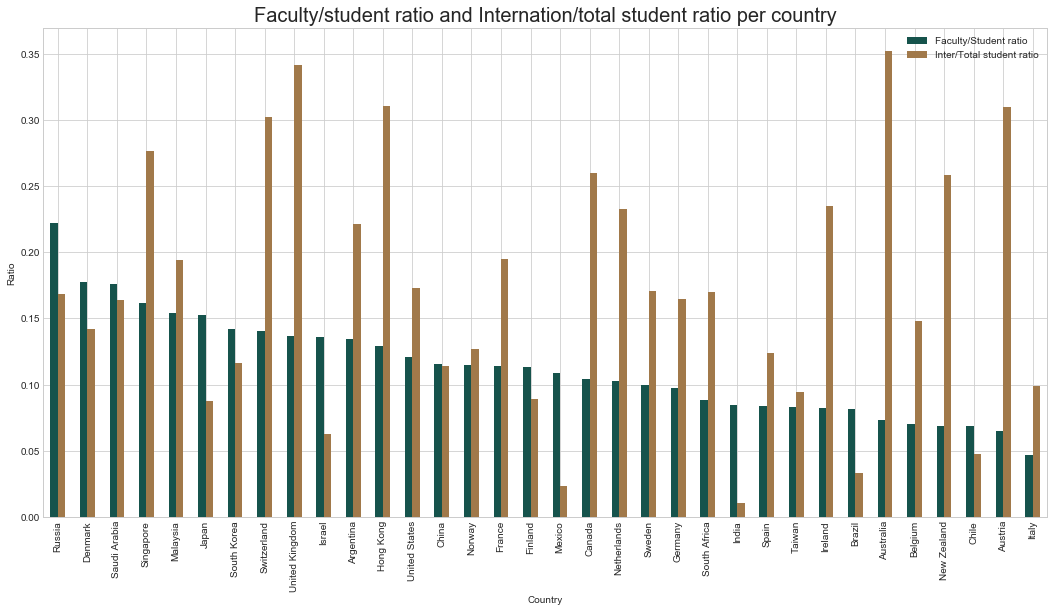

In [116]:
#Creating new dataframe with relevant data
topuni_country_df_plot = topuni_country_df.drop(['Total Students', 'International Students','Total Faculty','International Faculty'], axis=1)
topuni_country_df_plot = topuni_country_df_plot.sort_values('Faculty/Student ratio',ascending=False)
topuni_country_df_plot = topuni_country_df_plot.set_index('country') 

#plotting and adding info
topuni_country_df_plot.plot.bar(figsize=(18,9))

plt.title('Faculty/student ratio and Internation/total student ratio per country',fontsize=20)
plt.ylabel('Ratio')
plt.xlabel('Country')
plt.show()

Here we have a similar plot as the previous one but here with the data aggregated per country.

In [140]:
#Making the dataframe ready for plotting
topuni_df_rank = topuni_df.drop(['title','Total Students','International Students','Total Faculty','International Faculty','Faculty/Student ratio','Inter/Total student ratio'],axis=1)
topuni_df_rank['rank_display'] = topuni_df_rank['rank_display'].map(lambda x: x.replace('=',''))
topuni_df_rank['rank_display'] = pd.to_numeric(topuni_df_rank['rank_display'])
topuni_df_rank = topuni_df_rank.groupby('country',as_index=False).mean()
#topuni_df_rank = topuni_df_rank.set_index('country')
topuni_df_rank = topuni_df_rank.sort_values('rank_display')
topuni_df_rank.head()

,country,rank_display
25,Singapore,13.000000
12,Hong Kong,49.200000
7,China,66.142857
1,Australia,71.222222
0,Argentina,75.000000


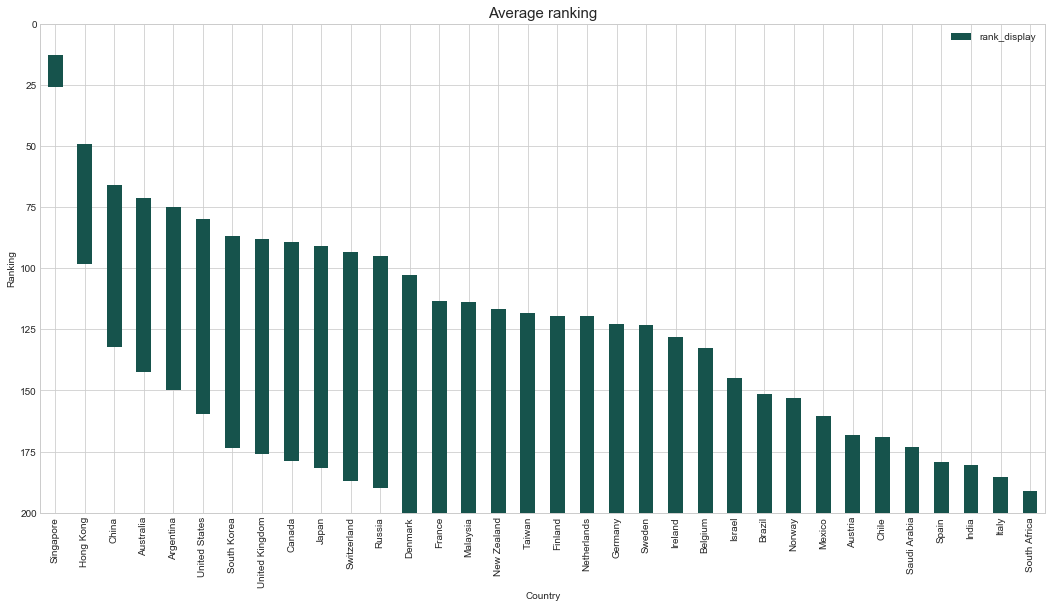

In [149]:
#Plotting and adding info
topuni_df_rank.plot.bar(topuni_df_rank.country,bottom=topuni_df_rank.rank_display,figsize=(18,9))

plt.title('Average ranking',fontsize=15)
plt.ylabel('Ranking')
plt.xlabel('Country')
plt.ylim(200,0)
plt.show()

### Task 2:
Obtain the 200 top-ranking universities in www.timeshighereducation.com ([ranking 2018](http://timeshighereducation.com/world-university-rankings/2018/world-ranking)).

In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total).

Store the resulting dataset in a pandas DataFrame and answer the following questions:
- Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?
- Answer the previous question aggregating the data by (c) country and (d) region.

In order to extract this information, we first examined the webpage using Postman Interceptor. We discovered that the data is not found in the html, rather it is imported from a [json file](https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json) requested from the server.

So we make a request for this same file, and import the data from the json to a dataframe.

Since the data is sorted, we trim the dataframe to have only the top 200 results. Thus we have the Name, Rank, Country and Region for each of these universities. We drop the columns we do not require.

In order to get the remaining data, we keep the url column for now.

In [181]:
#import timesedu data
timesedu_url = 'https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
request = requests.get(timesedu_url)
timesedu_data = request.json()['data']

#add data to dataframe
timesedu_df = pd.io.json.json_normalize(timesedu_data)

#trim data frame to top 200 universities
timesedu_df = timesedu_df.head(200)

#drop columns that we don't need
timesedu_df = timesedu_df.drop(["member_level","nid","url","scores_international_outlook","scores_international_outlook_rank","scores_overall","scores_overall_rank","record_type","scores_research","scores_research_rank","scores_teaching","scores_teaching_rank","stats_female_male_ratio","subjects_offered","scores_citations","scores_citations_rank","scores_industry_income","scores_industry_income_rank"],axis=1)

In [182]:
#addRegions
mappingDict = {}
for row in topuni_df.iterrows():
    mappingDict[row[1][0]] = row[1][2]

#manually adding missing countries/alternative spellings in dict
mappingDict['Luxembourg'] = 'Europe'
mappingDict['Russian Federation'] = 'Europe'

timesedu_df['Region'] = timesedu_df['location'].map(mappingDict)

In [183]:
#adding columns for international students
timesedu_df["Total Students"] = timesedu_df['stats_number_students'].map(lambda x : x.replace(',',''))
timesedu_df["Inter/Total student ratio"] = (timesedu_df['stats_pc_intl_students'].map(lambda x : x.replace('%','')).map(int))/100
timesedu_df["International Students"] = ((timesedu_df['Total Students'].map(float))*(timesedu_df['Inter/Total student ratio'].map(float))).map(int)

# #adding columns for total faculty and international faculty
timesedu_df["Total Faculty"] = (timesedu_df["Total Students"].map(float)/timesedu_df["stats_student_staff_ratio"].map(float)).map(int)
timesedu_df["International Faculty"] = float('NaN')
timesedu_df["Faculty/Student ratio"] = 1/timesedu_df["stats_student_staff_ratio"].map(float)

timesedu_df = timesedu_df.drop(["stats_number_students","stats_pc_intl_students","stats_student_staff_ratio"],axis=1)



In [184]:
timesedu_df

,aliases,location,name,rank,rank_order,Region,Total Students,Inter/Total student ratio,International Students,Total Faculty,International Faculty,Faculty/Student ratio
0,University of Oxford,United Kingdom,University of Oxford,1,10,Europe,20409,0.38,7755,1822,NaN,0.089286
1,University of Cambridge,United Kingdom,University of Cambridge,2,20,Europe,18389,0.35,6436,1687,NaN,0.091743
2,California Institute of Technology caltech,United States,California Institute of Technology,=3,30,North America,2209,0.27,596,339,NaN,0.153846
3,Stanford University,United States,Stanford University,=3,40,North America,15845,0.22,3485,2112,NaN,0.133333
4,Massachusetts Institute of Technology,United States,Massachusetts Institute of Technology,5,50,North America,11177,0.34,3800,1284,NaN,0.114943
5,Harvard University,United States,Harvard University,6,60,North America,20326,0.26,5284,2283,NaN,0.112360
6,Princeton University,United States,Princeton University,7,70,North America,7955,0.24,1909,958,NaN,0.120482
7,Imperial College London,United Kingdom,Imperial College London,8,80,Europe,15857,0.55,8721,1390,NaN,0.087719
8,University of Chicago,United States,University of Chicago,9,90,North America,13525,0.25,3381,2181,NaN,0.161290
9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,ETH Zurich – Swiss Federal Institute of Techno...,=10,100,Europe,19233,0.38,7308,1317,NaN,0.068493


We now have all the data from Times Higher Education in a single dataframe. In order to answer question a) through d) using this data, we will exclude a few more rows that are not relevant for those questions. It should be noted that the ranking are already in the dataframe timesedu_df and therefore all we need is to sort the data (and group it for questio c and d).

#### a) Which are the best universities in terms of the ratio between faculty members and students?
To answer this question we just sort our dataframe by this value. We assume that the higher the ratio, the better the university is. (1 faculty : 5 students is better than 1 faculty : 10 students)

In [187]:
timesedu_df.sort_values('Faculty/Student ratio',ascending=False).head(3)

,aliases,location,name,rank,rank_order,Region,Total Students,Inter/Total student ratio,International Students,Total Faculty,International Faculty,Faculty/Student ratio
105,Vanderbilt University,United States,Vanderbilt University,=105,1060,North America,12011,0.13,1561,3639,NaN,0.303030
109,University of Copenhagen,Denmark,University of Copenhagen,=109,1100,Europe,30395,0.14,4255,7413,NaN,0.243902
153,University of Rochester,United States,University of Rochester,=153,1540,North America,9636,0.29,2794,2240,NaN,0.232558


We see that the best university when it comes to faculty/student ratio is Vanderbilt University in USA.

#### b) Which are the best universities in terms of the ratio of international students
To answer this question we will simply sort our dataframe by this value. We assume that the higher the ratio, the better the university is. (1 international : 5 total is better than 1 international : 10 total)

In [189]:
timesedu_df.sort_values('Inter/Total student ratio',ascending=False).head(3)

,aliases,location,name,rank,rank_order,Region,Total Students,Inter/Total student ratio,International Students,Total Faculty,International Faculty,Faculty/Student ratio
24,London School of Economics and Political Science,United Kingdom,London School of Economics and Political Science,=25,250,Europe,10065,0.71,7146,825,NaN,0.081967
178,University of Luxembourg,Luxembourg,University of Luxembourg,=179,1790,Europe,4969,0.57,2832,340,NaN,0.068493
37,École Polytechnique Fédérale de Lausanne,Switzerland,École Polytechnique Fédérale de Lausanne,=38,380,Europe,9928,0.55,5460,886,NaN,0.089286


We observe that London School of Economics and Political Science is the best in order of ration between international and total amount of students.

#### c) Aggregate by country
To answer this question we will aggregate all the values by country and while doing so calculating the mean of all the numeric values.

In [194]:
timesedu_df.groupby('location',as_index=False).mean().sort_values('Faculty/Student ratio',ascending=False).head(3)

,location,Inter/Total student ratio,International Students,Total Faculty,International Faculty,Faculty/Student ratio
5,Denmark,0.166667,3108.666667,3532.0,NaN,0.160166
11,Italy,0.105000,66.000000,78.5,NaN,0.138889
17,Russian Federation,0.220000,6431.000000,4004.0,NaN,0.136986


In [195]:
timesedu_df.groupby('location',as_index=False).mean().sort_values('Inter/Total student ratio',ascending=False).head(3)

,location,Inter/Total student ratio,International Students,Total Faculty,International Faculty,Faculty/Student ratio
13,Luxembourg,0.570000,2832.000000,340.000000,NaN,0.068493
25,United Kingdom,0.365484,6872.419355,1433.064516,NaN,0.074252
9,Hong Kong,0.328000,5031.400000,828.000000,NaN,0.056622


We see that the country with the best Faculty/Student ratio is __Denmark__ and the country with the best International/total student ration is __Luxembourg__.

#### d) Aggregate by region
To answer this question we will add aggregate all the values by region while calculating the means.

In [197]:
timesedu_df.groupby('Region',as_index=False).mean().sort_values('Faculty/Student ratio',ascending=False).head(3)

,Region,Inter/Total student ratio,International Students,Total Faculty,International Faculty,Faculty/Student ratio
3,North America,0.185588,4944.705882,2434.602941,NaN,0.101655
0,Africa,0.180000,3739.000000,1775.000000,NaN,0.085470
1,Asia,0.165238,3753.666667,2029.904762,NaN,0.080345


In [198]:
timesedu_df.groupby('Region',as_index=False).mean().sort_values('Inter/Total student ratio',ascending=False).head(3)

,Region,Inter/Total student ratio,International Students,Total Faculty,International Faculty,Faculty/Student ratio
4,Oceania,0.305556,10289.666667,1283.444444,NaN,0.039895
2,Europe,0.244653,4767.623762,1255.603960,NaN,0.065952
3,North America,0.185588,4944.705882,2434.602941,NaN,0.101655


We see that the regions who perform best is: __North America__ with respect to Faculty/Student ratio and __Oceania__ with respect to International/Total student ratio.

We will now do some visualizations of the data from Times Higher Education, so that we visually can interpret the differences between the two datasources.

We start of by creating a dataframe that only contains the ratios and is aggregated by region.

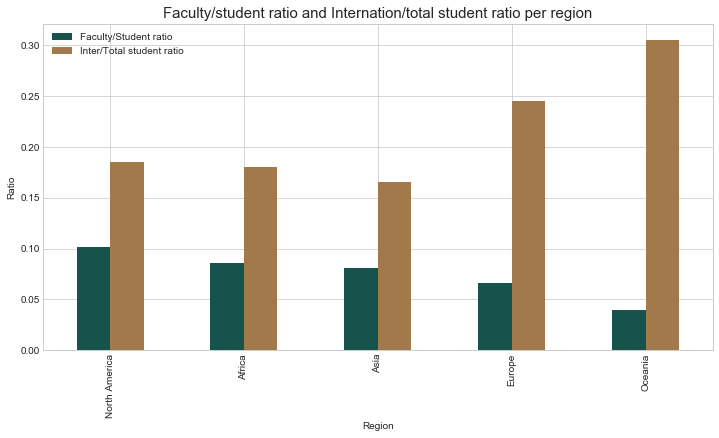

In [162]:
#Creating new dataframe only containing relevant data
timesedu_region_df_plot = timesedu_df.drop(['aliases','location','name','rank','rank_order','Total Students','International Students','Total Faculty','International Faculty'], axis=1)
timesedu_region_df_plot = timesedu_region_df_plot.groupby('Region',as_index=False).mean()
timesedu_region_df_plot = timesedu_region_df_plot.sort_values('Faculty/Student ratio',ascending=False)
timesedu_region_df_plot = timesedu_region_df_plot[['Region','Faculty/Student ratio','Inter/Total student ratio']]
timesedu_region_df_plot = timesedu_region_df_plot.set_index('Region')


#Plotting and adding info
timesedu_region_df_plot.plot.bar(figsize=(12,6))

plt.title('Faculty/student ratio and Internation/total student ratio per region',fontsize=15)
plt.ylabel('Ratio')
plt.xlabel('Region')
plt.show()

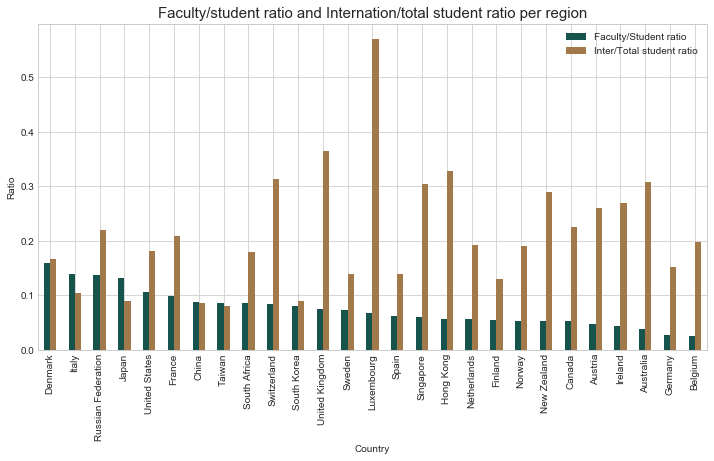

In [174]:
#Creating new dataframe only containing relevant data
timesedu_country_df_plot = timesedu_df.drop(['aliases','Region','name','rank','rank_order','Total Students','International Students','Total Faculty','International Faculty'], axis=1)
timesedu_country_df_plot = timesedu_country_df_plot.groupby('location',as_index=False).mean()
timesedu_country_df_plot = timesedu_country_df_plot.sort_values('Faculty/Student ratio',ascending=False)
timesedu_country_df_plot = timesedu_country_df_plot[['location','Faculty/Student ratio','Inter/Total student ratio']]
timesedu_country_df_plot = timesedu_country_df_plot.set_index('location')


#Plotting and adding info
timesedu_country_df_plot.plot.bar(figsize=(12,6))

plt.title('Faculty/student ratio and Internation/total student ratio per region',fontsize=15)
plt.ylabel('Ratio')
plt.xlabel('Country')
plt.show()